## Graphing Trends By Country

In [6]:
import pandas as pd
import os, re
import seaborn as sns
import matplotlib.pyplot as plt

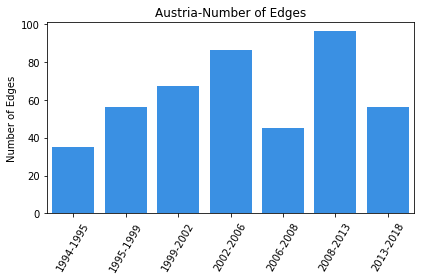

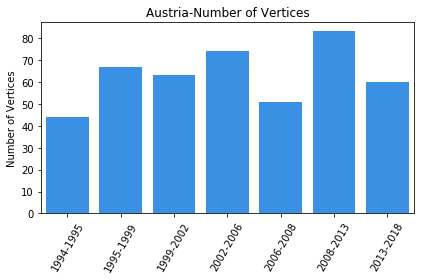

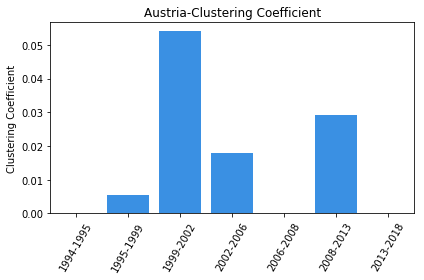

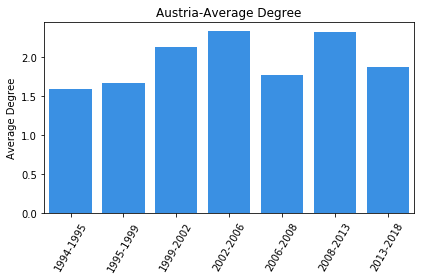

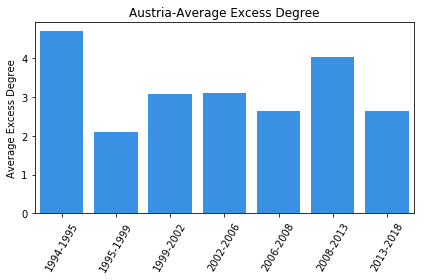

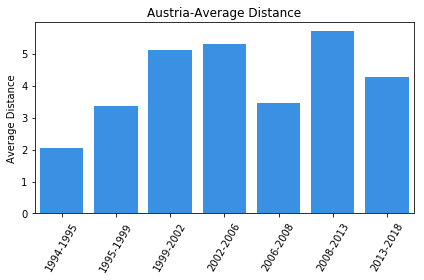

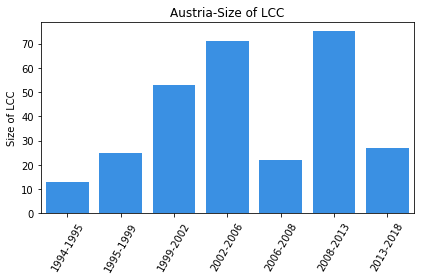

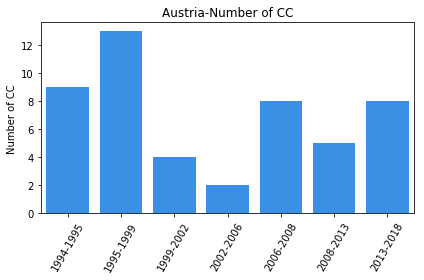

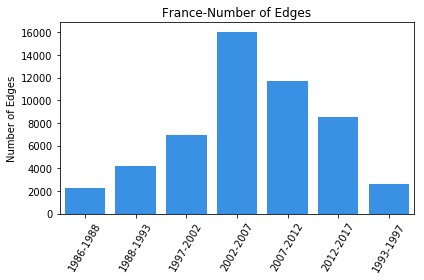

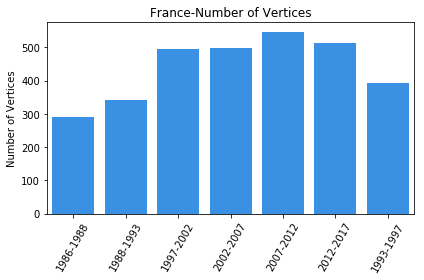

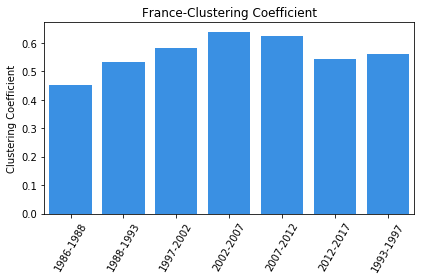

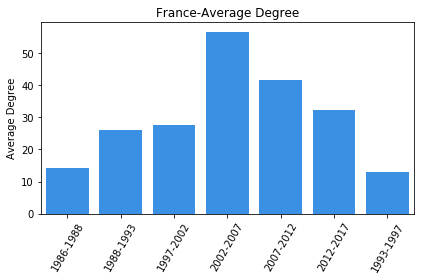

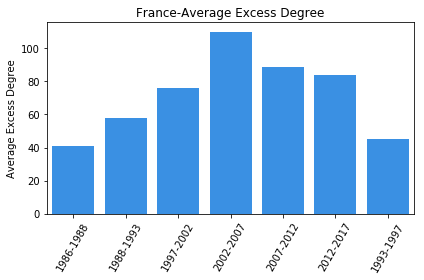

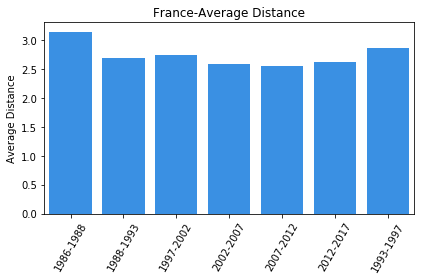

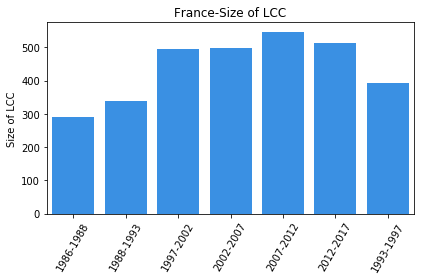

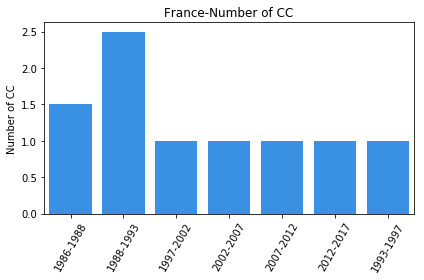

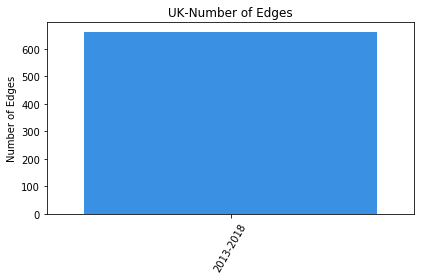

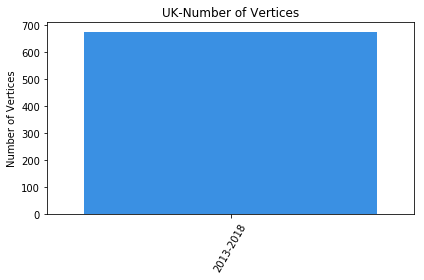

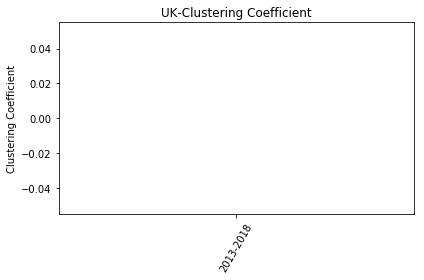

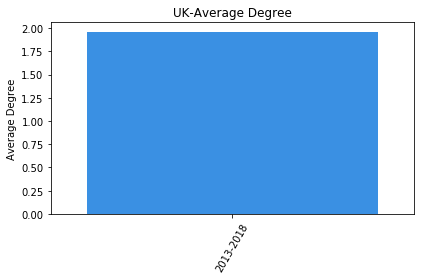

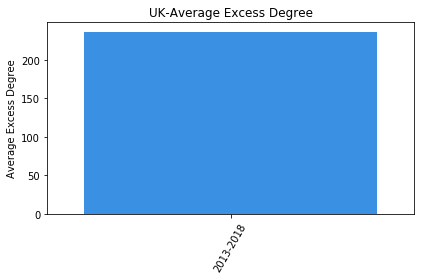

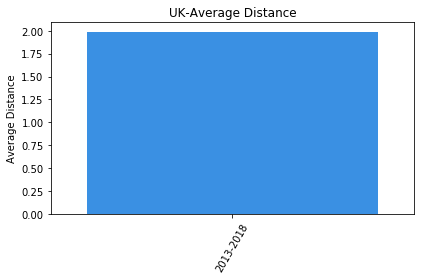

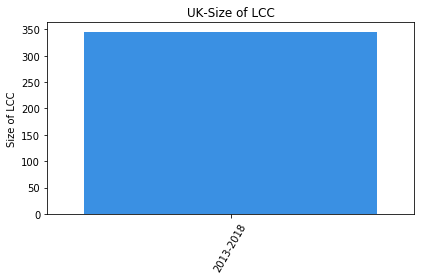

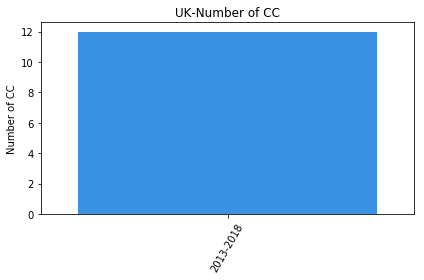

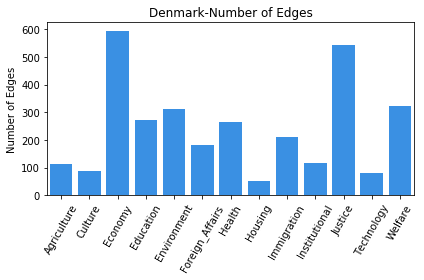

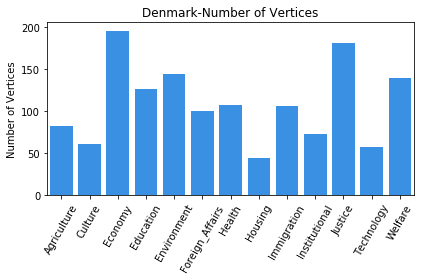

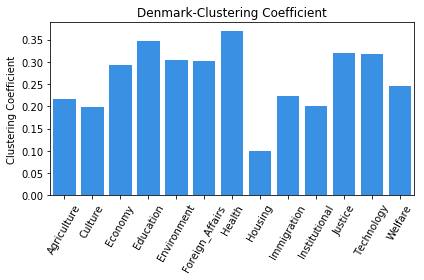

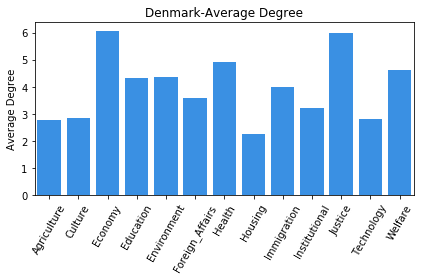

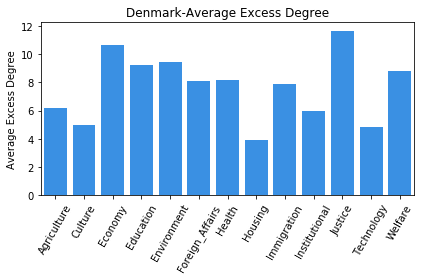

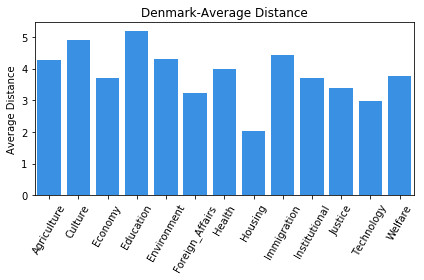

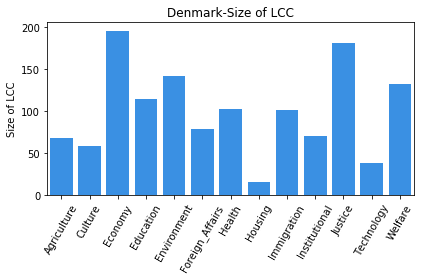

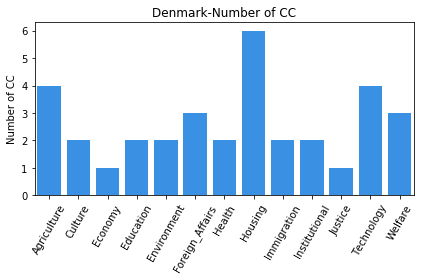

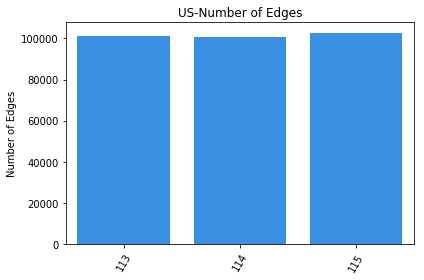

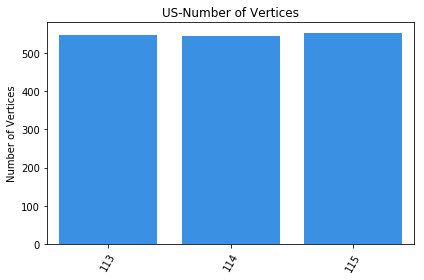

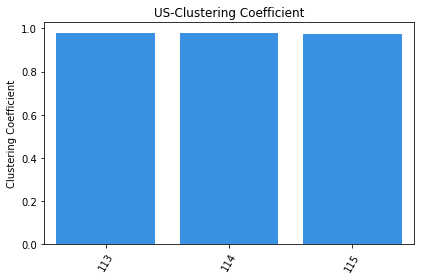

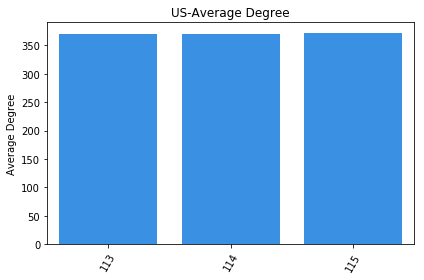

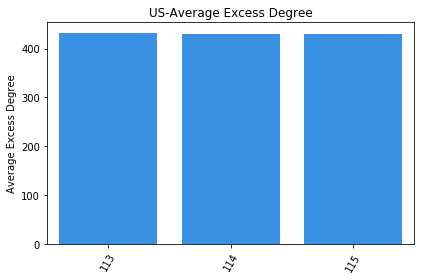

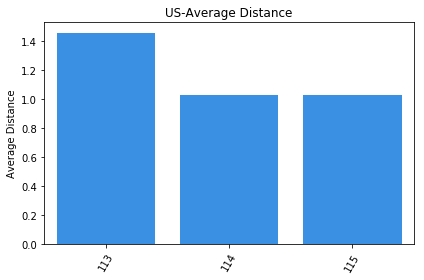

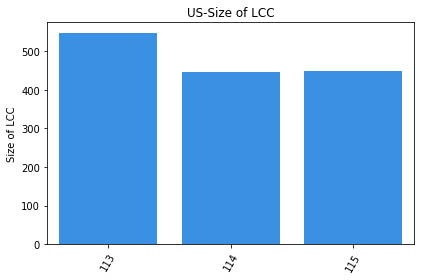

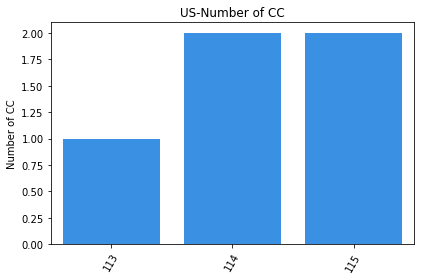

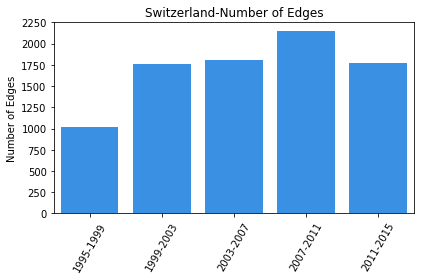

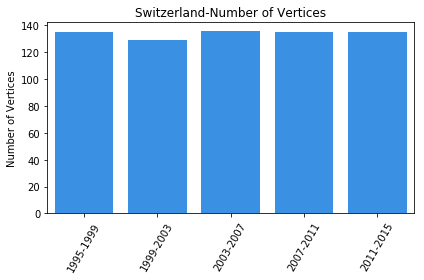

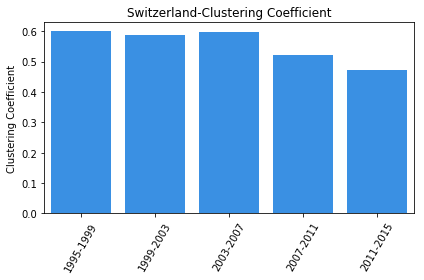

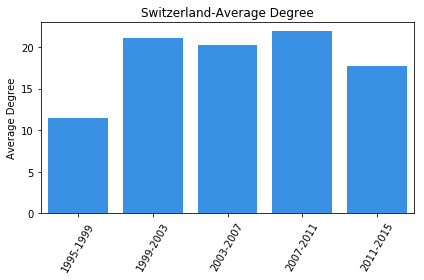

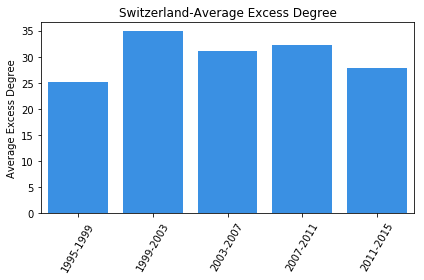

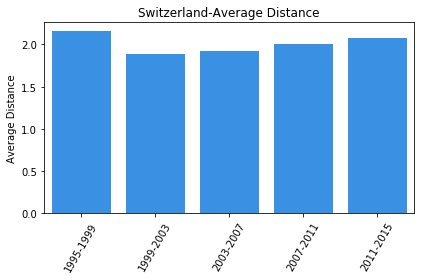

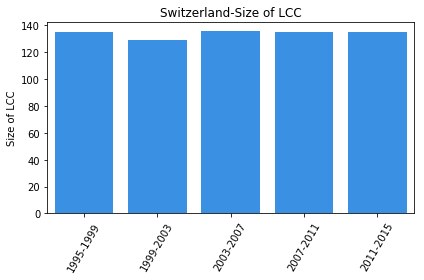

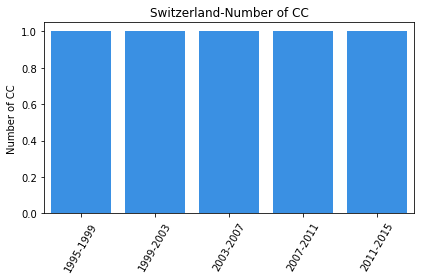

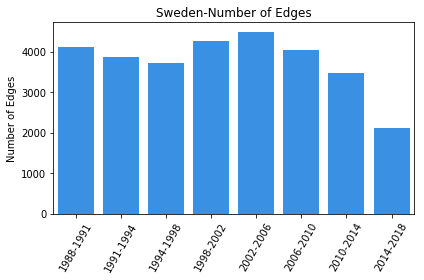

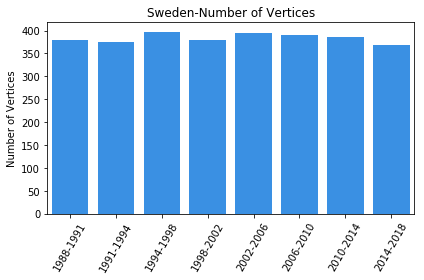

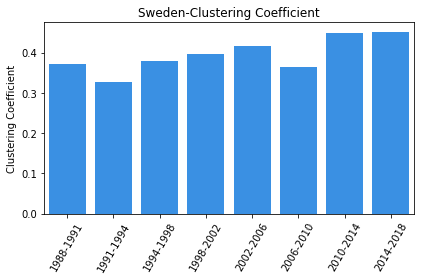

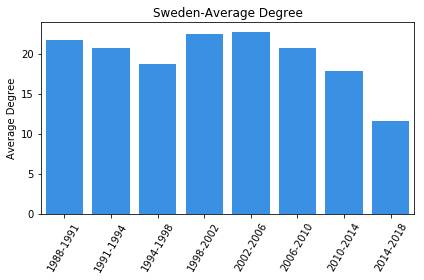

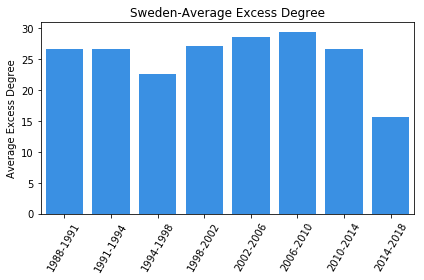

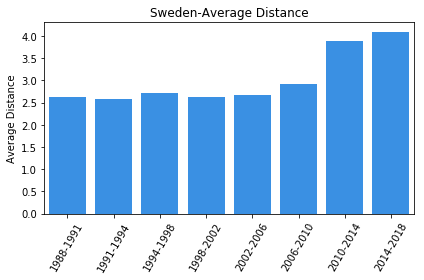

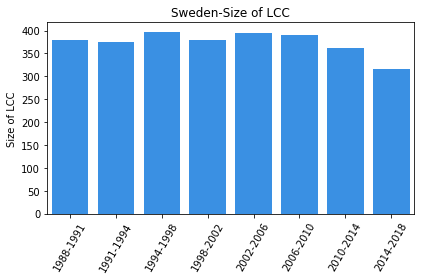

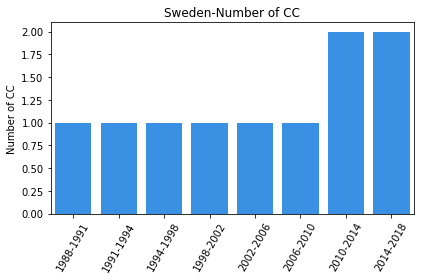

In [7]:
# Go through all the relevant csv in summary/ one at a time

dir = 'summary/'
for file in os.listdir(dir):
    if re.match(r'^summary.\w*.csv$', file):
        name = file.split('.')[1].capitalize()
        if len(name) <= 2:
            name = name.upper()
        path = dir + file
        data = pd.read_csv(path, index_col='Name')
        clean_data = data.sort_index()
        clean_data.index = [re.search(r'\d{4}-\d{4}|\d{3}|[A-Z]\w+', x).group(0) for x in clean_data.index.values]
        
        # For each feature, create a plot where x-axis = Subset within Country, y-axis = Features

        for count, i in enumerate(clean_data.columns):
            y_label = list(clean_data.columns.values)[count]
            plt.figure()
            plot = sns.barplot(x = clean_data.index, y = y_label, 
                               data = clean_data[[i]], 
                               ci = None,
                               color = "dodgerblue")
            plt.xticks(rotation=60)
            plot_name = name + "-"+ y_label
            plt.title(plot_name)
            plt.tight_layout()
            
            # Save Figure
            save_path = 'plots/stats/' + name + "/" + plot_name
            fig = plot.get_figure()
            fig.savefig(save_path)